# Step 8: Train linear regression model

This model will serve as a baseline for later regression models. We need to complete the following steps:
1. Prepare data
2. Load and save the model
3. Setup logging
4. Train model

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import keras.backend as K
K.clear_session()

Using TensorFlow backend.


In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

## Prepare data

In [4]:
from tep.utils import load_array
feats = load_array("data/auxiliary_features.bc")
labels = load_array("data/regression_labels.bc")
print(feats.shape)
print(labels.shape)

(1293005, 15)
(1293005,)


In [5]:
# transform labels to log(x+1) in order to account for zero values
import numpy as np
print(labels[:20])
labels = np.log1p(labels)
print(labels[:20])

[ 120    0    3    5    0    3    0   46    2    0    0    1 2666   74    1
    3    0    2    0    0]
[ 4.79579055  0.          1.38629436  1.79175947  0.          1.38629436
  0.          3.8501476   1.09861229  0.          0.          0.69314718
  7.88870952  4.31748811  0.69314718  1.38629436  0.          1.09861229
  0.          0.        ]


## Load and save model

In [6]:
from tep.trainUtils import r2

In [7]:
from tep.linearModel import regression_model
model = regression_model(feats.shape[1], metrics=[r2])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 15)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 76
Trainable params: 46
Non-trainable params: 30
_________________________________________________________________


In [8]:
# save model architecture
from tep.modelUtils import save_architecture
model_name = "lin_reg"
model_path = "models/" + model_name
save_architecture(model, model_path + ".json")

## Setup logging

In [9]:
!mkdir $model_path

mkdir: models/lin_reg: File exists


In [10]:
!rm $model_path/*

In [11]:
from tep.trainUtils import get_callbacks
cbs = get_callbacks(model_name=model_name, log_dir=model_path, verbose=1)

## Train the model

In [12]:
# use settings for testing on sample
train_size = 10000
val_size = 1000
batch_size = 64

# use settings for running on full data
#val_size = 10000
#train_size = feats.shape[0] - val_size
#batch_size = 512

In [13]:
# now, we can train the model for the first time
model.fit(feats[:train_size], 
          labels[:train_size], 
          validation_data=(feats[-val_size:], labels[-val_size:]), 
          batch_size=batch_size, 
          epochs=100, 
          verbose=2,
          shuffle=True,
          callbacks=cbs)

Train on 10000 samples, validate on 1000 samples
Epoch 1/100
Epoch 00001: val_loss improved from inf to 4.79110, saving model to models/lin_reg.hdf5
 - 1s - loss: 6.3598 - r2: -3.8482e-01 - val_loss: 4.7911 - val_r2: -1.8682e-02
Epoch 2/100
Epoch 00002: val_loss improved from 4.79110 to 4.07262, saving model to models/lin_reg.hdf5
 - 1s - loss: 4.7205 - r2: -3.1305e-02 - val_loss: 4.0726 - val_r2: 0.1313
Epoch 3/100
Epoch 00003: val_loss improved from 4.07262 to 3.67413, saving model to models/lin_reg.hdf5
 - 1s - loss: 3.8771 - r2: 0.1488 - val_loss: 3.6741 - val_r2: 0.2171
Epoch 4/100
Epoch 00004: val_loss improved from 3.67413 to 3.46775, saving model to models/lin_reg.hdf5
 - 1s - loss: 3.6013 - r2: 0.1973 - val_loss: 3.4678 - val_r2: 0.2619
Epoch 5/100
Epoch 00005: val_loss improved from 3.46775 to 3.34756, saving model to models/lin_reg.hdf5
 - 1s - loss: 3.3818 - r2: 0.2541 - val_loss: 3.3476 - val_r2: 0.2867
Epoch 6/100
Epoch 00006: val_loss improved from 3.34756 to 3.25515, sa

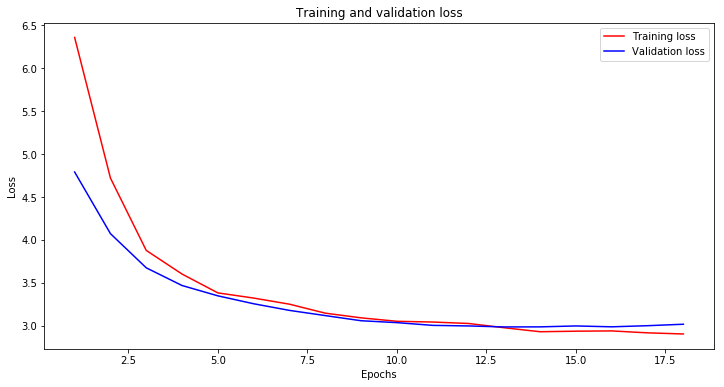

In [14]:
from tep.trainUtils import plot_loss
history = cbs[2]
plot_loss(history)

In [15]:
from tep.trainUtils import print_regression_metrics
print_regression_metrics(history)

loss: 2.9752469455718993, r2: 0.34046340703964234, val_loss: 2.984891432762146, val_r2: 0.3593912477493286
